# WeatherPy

In [1]:
# Dependencies and setup.

%matplotlib inline

import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy to get cities based on latitude and longitude
from citipy import citipy

# Output file (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Weather API key.
weather_api_key

'a6a71f9604b1a38f6deb7dbe79c0c329'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat-lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to cities list only if city is unique.
    if city not in cities:
         cities.append(city)

# Print the city count to check for sufficient count.
len(cities)

608

## Perform API Calls

In [4]:
# Starting empty lists to store all data after retrieval.

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
latitude = []
longitude = []
wind = []

In [5]:
# Starting URL for Open Open Weather Map API Call.

record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Print the data header.
print("BEGINNING DATA RETRIEVAL")
print("-----------------------------------------")

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])          
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

# Print the data footer to indicate completion of data retrieval.
print("-------------------------")
print("DATA RETRIEVAL COMPLETE")

BEGINNING DATA RETRIEVAL
-----------------------------------------
Processing record 1 of set 0 | sagone
Processing record 2 of set 0 | banda aceh
Processing record 3 of set 0 | kiunga
Processing record 4 of set 0 | tautira
Processing record 5 of set 0 | khatanga
Processing record 6 of set 0 | leningradskiy
Processing record 7 of set 0 | kodiak
Processing record 8 of set 0 | nanortalik
Processing record 9 of set 0 | bluff
Processing record 10 of set 0 | avarua
Processing record 11 of set 0 | port alfred
Processing record 12 of set 0 | taolanaro
City not found!
Processing record 13 of set 0 | lebu
Processing record 14 of set 0 | hobart
Processing record 15 of set 0 | severo-kurilsk
Processing record 16 of set 0 | meulaboh
Processing record 17 of set 0 | arraias
Processing record 18 of set 0 | hermanus
Processing record 19 of set 0 | bredasdorp
Processing record 20 of set 0 | nizhniy baskunchak
Processing record 21 of set 0 | bengkulu
Processing record 22 of set 0 | rikitea
Processing re

### Convert Raw Data to DataFrame

In [6]:
# Create a dataframe from array of JSONs.
weather_dict = {
    "City": new_cities,
    "Latitude" : latitude,
    "Longitude" : longitude, 
    "Country" : country,
    "Wind Speed" : wind,   
    "Max Temp": temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Date" : date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          559
Latitude      559
Longitude     559
Country       559
Wind Speed    559
Max Temp      559
Humidity      559
Cloudiness    559
Date          559
dtype: int64

In [7]:
# Display the dataframe.        
weather_data.head()

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,sagone,42.12,8.70,FR,13.87,62.60,59,84,1601081752
1,banda aceh,5.56,95.32,ID,6.78,80.35,71,100,1601081530
2,kiunga,-6.12,141.29,PG,3.69,80.08,82,100,1601081752
3,tautira,-17.73,-149.15,PF,12.75,84.20,66,40,1601081753
4,khatanga,71.97,102.50,RU,14.74,40.10,84,100,1601081753


In [8]:
cities_list = zip(new_cities, latitude, longitude, country, temp, humidity, cloudiness, wind, date)

# Set variable for output file.
output_file = os.path.join("output_data", "cities.csv")

#  Open the output file.
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

## Inspect the data and remove the cities where the humidity > 100%.

In [16]:
#  Get indices of cities with humidity over 100%.
all_weather_data = weather_data[(weather_data["Humidity"] > 100)].index

# Make new dataframe after dropping all humidity > 100% by index.
weather_data_final = weather_data.drop(all_weather_data, inplace=False)
weather_data_final

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,sagone,42.12,8.70,FR,13.87,62.60,59,84,1601081752
1,banda aceh,5.56,95.32,ID,6.78,80.35,71,100,1601081530
2,kiunga,-6.12,141.29,PG,3.69,80.08,82,100,1601081752
3,tautira,-17.73,-149.15,PF,12.75,84.20,66,40,1601081753
4,khatanga,71.97,102.50,RU,14.74,40.10,84,100,1601081753
...,...,...,...,...,...,...,...,...,...
554,komsomolskiy,40.43,71.72,UZ,2.24,53.60,58,0,1601081881
555,taltal,-25.40,-70.48,CL,2.93,57.18,73,61,1601081882
556,grakhovo,56.05,51.97,RU,6.71,42.80,81,83,1601081882
557,moussoro,13.64,16.49,TD,4.47,89.28,39,100,1601081882


In [17]:
# Extract fields from dataframe.
lats = weather_data_final["Latitude"]
max_temps = weather_data_final["Max Temp"]
humidity = weather_data_final["Humidity"]
cloudiness = weather_data_final["Cloudiness"]
wind_speed = weather_data_final["Wind Speed"]

# Export data to a csv file.
weather_data_final.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data

## Latitude vs. Temperature Plot

In [51]:
# Format date stamp

date = datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

print(date)

09/26/2020


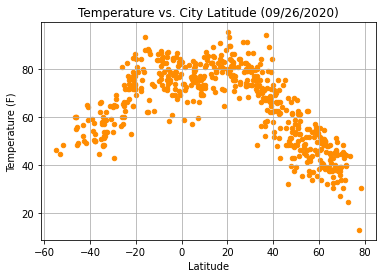

In [52]:
weather_data_final.plot(kind="scatter", x="Latitude", y="Max Temp", c="DarkOrange")
plt.title("Temperature vs. City Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("output_data/Temperature_vs_Latitude.png")

## Latitude vs. Humidity Plot

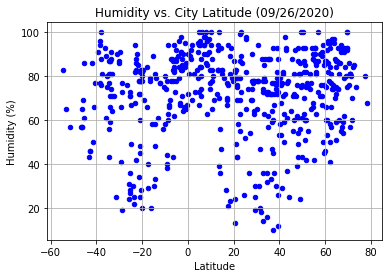

In [53]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Humidity", c="Blue")
plt.title("Humidity vs. City Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Humidity_vs_Latitude.png")

## Latitude vs. Cloudiness Plot

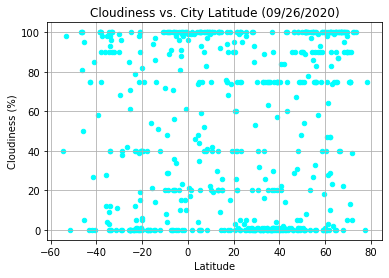

In [54]:
weather_data.plot(kind="scatter",x="Latitude",y="Cloudiness", c="Cyan")
plt.title("Cloudiness vs. City Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

## Latitude vs. Wind Speed Plot

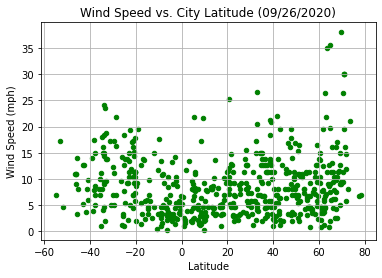

In [56]:
weather_data.plot(kind="scatter",x="Latitude",y="Wind Speed", c="Green")
plt.title("Wind Speed vs. City Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/WindSpeed_vs_Latitude.png")